## 1. Load a PyTorch Model

In [24]:
from torchvision.models import resnet18, ResNet18_Weights

# Step 1: Initialize model with the best available weights
weights = ResNet18_Weights.DEFAULT
model = resnet18(weights=weights)
model.eval()

# Ensure the model is in evaluation mode
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## 2. Load dataset

In [25]:
from torchvision.datasets import ImageNet
from torchvision.transforms import ToTensor

# Define a data loader for your test dataset
test_data = ImageNet(
    root=r"C:\Users\sohrab.tawana\code\CoC AI\AI on Edge\imagenet-1k\data",
    train=False,
    download=False,
    transform=ToTensor()
)

RuntimeError: The archive ILSVRC2012_devkit_t12.tar.gz is not present in the root directory or is corrupted. You need to download it externally and place it in C:\Users\sohrab.tawana\code\CoC AI\AI on Edge\imagenet-1k\data.

## 3. Benchmarking Original Model

### (a) Accuracy

In [ ]:
# Compute accuracy
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

accuracy = 100 * correct / total

### (b) Speed

In [ ]:
import time

# Measure the time taken for a single inference
start_time = time.time()
output = model(data)
end_time = time.time()

inference_time = end_time - start_time

## 4. Optimize and Compress the Model

### (a) Quantization

In [ ]:
# Quantize the model (Assuming model and data are on CPU)
quantized_model = torch.quantization.quantize_dynamic(
    model, {torch.nn.Linear}, dtype=torch.qint8
)

### (b) Convert to ONNX

In [ ]:
# Convert to ONNX format
dummy_input = torch.randn(1, 3, 224, 224)
torch.onnx.export(model, dummy_input, "model.onnx")

## 5. Benchmarking Optimized Model
### (a) Accuracy of the Optimized Model

In [ ]:
# Compute accuracy for the optimized model
correct_opt = 0
total_opt = 0

# Ensure the model is in evaluation mode
quantized_model.eval()

with torch.no_grad():
    for data, target in test_loader:
        output = quantized_model(data)
        _, predicted = torch.max(output.data, 1)
        total_opt += target.size(0)
        correct_opt += (predicted == target).sum().item()

accuracy_opt = 100 * correct_opt / total_opt

### (b) Speed of the Optimized Model

In [ ]:
# Measure the time taken for a single inference by the optimized model
start_time_opt = time.time()
output = quantized_model(data)
end_time_opt = time.time()

inference_time_opt = end_time_opt - start_time_opt

## 6. Comparison
### Compare the original and optimized models in terms of size, accuracy, and speed. Provide visualizations like bar graphs for a clear comparison.

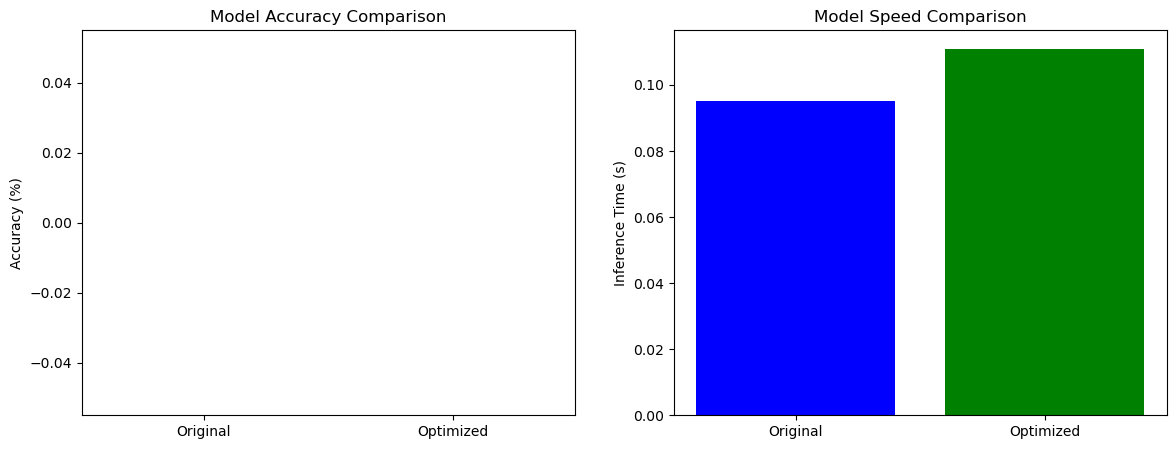

In [ ]:
import matplotlib.pyplot as plt

# Values
accuracies = [accuracy, accuracy_opt]
speeds = [inference_time, inference_time_opt]
labels = ['Original', 'Optimized']

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].bar(labels, accuracies, color=['blue', 'green'])
ax[0].set_ylabel('Accuracy (%)')
ax[0].set_title('Model Accuracy Comparison')

ax[1].bar(labels, speeds, color=['blue', 'green'])
ax[1].set_ylabel('Inference Time (s)')
ax[1].set_title('Model Speed Comparison')

plt.show()